# Medical Insurance Cost Analysis
## Mohammed Es-Sabri - Data Analytics Portfolio

**Business Question:** What factors drive medical insurance costs?

**Dataset:** US Health Insurance Dataset from Kaggle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
try:
    df = pd.read_csv('insurance.csv')
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
except FileNotFoundError:
    print("Error: insurance.csv not found!")
    print("Please download the dataset from Kaggle and save it in the same folder as this notebook")

Dataset loaded successfully!
Shape: (1338, 7)

First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [5]:
print("=== DATASET OVERVIEW ===")
print(f"Total records: {len(df):,}")
print(f"Columns: {list(df.columns)}")

print("\n=== MISSING VALUES CHECK ===")
print(df.isnull().sum())

print("\n=== DATA TYPES ===")
print(df.dtypes)

print("\n=== STATISTICAL SUMMARY ===")
print(df.describe())

=== DATASET OVERVIEW ===
Total records: 1,338
Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

=== MISSING VALUES CHECK ===
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

=== DATA TYPES ===
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

=== STATISTICAL SUMMARY ===
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [6]:
print("=== CATEGORICAL VARIABLES ===")

print("Sex Distribution:")
print(df['sex'].value_counts())

print("\nSmoking Status:")
print(df['smoker'].value_counts())

print("\nRegion Distribution:")
print(df['region'].value_counts())

=== CATEGORICAL VARIABLES ===
Sex Distribution:
sex
male      676
female    662
Name: count, dtype: int64

Smoking Status:
smoker
no     1064
yes     274
Name: count, dtype: int64

Region Distribution:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [7]:
# Question 1: What's the impact of smoking on medical costs?
print("=== SMOKING IMPACT ON MEDICAL COSTS ===")

smoking_analysis = df.groupby('smoker')['charges'].agg(['count', 'mean', 'median'])
smoking_analysis.columns = ['patient_count', 'avg_cost', 'median_cost']
smoking_analysis = smoking_analysis.round(2)

print(smoking_analysis)

# Calculate the difference
smoker_avg = df[df['smoker'] == 'yes']['charges'].mean()
nonsmoker_avg = df[df['smoker'] == 'no']['charges'].mean()
cost_difference = smoker_avg - nonsmoker_avg
percent_increase = (cost_difference / nonsmoker_avg) * 100

print(f"\n💡 KEY FINDING:")
print(f"Smokers pay ${cost_difference:,.2f} more on average")
print(f"That's a {percent_increase:.1f}% increase in medical costs!")

=== SMOKING IMPACT ON MEDICAL COSTS ===
        patient_count  avg_cost  median_cost
smoker                                      
no               1064   8434.27      7345.41
yes               274  32050.23     34456.35

💡 KEY FINDING:
Smokers pay $23,615.96 more on average
That's a 280.0% increase in medical costs!


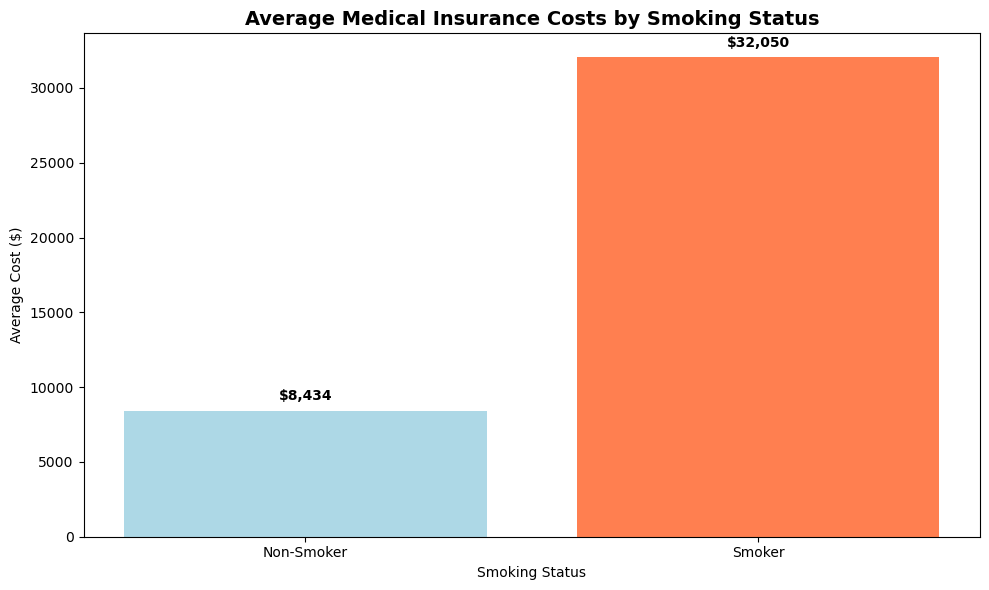

💡 Business Impact: Smoking increases insurance costs by nearly 300%!


In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Create bar chart
smoking_costs = [nonsmoker_avg, smoker_avg]
labels = ['Non-Smoker', 'Smoker']
colors = ['lightblue', 'coral']

bars = plt.bar(labels, smoking_costs, color=colors)
plt.title('Average Medical Insurance Costs by Smoking Status', fontsize=14, fontweight='bold')
plt.ylabel('Average Cost ($)')
plt.xlabel('Smoking Status')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 500,
             f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"💡 Business Impact: Smoking increases insurance costs by nearly 300%!")

In [9]:
# Question 2: Regional cost differences
print("=== REGIONAL COST ANALYSIS ===")

regional_analysis = df.groupby('region')['charges'].agg(['count', 'mean'])
regional_analysis.columns = ['patient_count', 'avg_cost']
regional_analysis = regional_analysis.sort_values('avg_cost', ascending=False).round(2)

print(regional_analysis)

highest_region = regional_analysis.index[0]
lowest_region = regional_analysis.index[-1]
regional_difference = regional_analysis.loc[highest_region, 'avg_cost'] - regional_analysis.loc[lowest_region, 'avg_cost']

print(f"\n💡 Regional Finding:")
print(f"Highest cost region: {highest_region} (${regional_analysis.loc[highest_region, 'avg_cost']:,.2f})")
print(f"Lowest cost region: {lowest_region} (${regional_analysis.loc[lowest_region, 'avg_cost']:,.2f})")
print(f"Regional difference: ${regional_difference:,.2f}")

=== REGIONAL COST ANALYSIS ===
           patient_count  avg_cost
region                            
southeast            364  14735.41
northeast            324  13406.38
northwest            325  12417.58
southwest            325  12346.94

💡 Regional Finding:
Highest cost region: southeast ($14,735.41)
Lowest cost region: southwest ($12,346.94)
Regional difference: $2,388.47


In [11]:
# Question 3: BMI impact on costs
print("=== BMI IMPACT ON MEDICAL COSTS ===")

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)

bmi_analysis = df.groupby('bmi_category')['charges'].agg(['count', 'mean'])
bmi_analysis.columns = ['patient_count', 'avg_cost']
bmi_analysis = bmi_analysis.round(2)

print(bmi_analysis)

# Compare normal vs obese
normal_cost = bmi_analysis.loc['Normal', 'avg_cost']
obese_cost = bmi_analysis.loc['Obese', 'avg_cost']
bmi_difference = obese_cost - normal_cost

print(f"\n💡 BMI Finding:")
print(f"Normal weight: ${normal_cost:,.2f}")
print(f"Obese: ${obese_cost:,.2f}")
print(f"Obesity premium: ${bmi_difference:,.2f}")

=== BMI IMPACT ON MEDICAL COSTS ===
              patient_count  avg_cost
bmi_category                         
Normal                  225  10409.34
Obese                   707  15552.34
Overweight              386  10987.51
Underweight              20   8852.20

💡 BMI Finding:
Normal weight: $10,409.34
Obese: $15,552.34
Obesity premium: $5,143.00


In [12]:
print("="*60)
print("EXECUTIVE SUMMARY - MEDICAL INSURANCE COST DRIVERS")
print("="*60)

print(f"Dataset: {len(df):,} patients analyzed")
print(f"Overall average cost: ${df['charges'].mean():,.2f}")

print("\nTOP COST DRIVERS (in order of impact):")
print("1. 🚭 SMOKING")
print(f"   • Cost increase: ${cost_difference:,.2f} ({percent_increase:.1f}%)")
print(f"   • Affects {len(df[df['smoker']=='yes'])} patients ({len(df[df['smoker']=='yes'])/len(df)*100:.1f}% of population)")

print("\n2. ⚖️ OBESITY") 
print(f"   • Cost increase: ${bmi_difference:,.2f}")
print(f"   • Affects {len(df[df['bmi_category']=='Obese'])} patients ({len(df[df['bmi_category']=='Obese'])/len(df)*100:.1f}% of population)")

print("\n3. 🏠 REGIONAL VARIATION")
print(f"   • Cost range: ${regional_difference:,.2f}")
print(f"   • Highest: Southeast (${regional_analysis.loc['southeast', 'avg_cost']:,.2f})")
print(f"   • Lowest: Southwest (${regional_analysis.loc['southwest', 'avg_cost']:,.2f})")

print("\n" + "="*60)
print("BUSINESS RECOMMENDATIONS")
print("="*60)

print("1. IMMEDIATE PRIORITY: Smoking Cessation Programs")
print(f"   • ROI potential: ${cost_difference:,.2f} per successful quitter")
print("   • Target high-cost smoking customers first")

print("\n2. WELLNESS INITIATIVES: Weight Management")
print(f"   • ROI potential: ${bmi_difference:,.2f} per patient moving to normal BMI")
print("   • Focus on obese customers with prevention programs")

print("\n3. REGIONAL STRATEGY: Cost Investigation")
print("   • Investigate Southeast region cost drivers")
print("   • Replicate Southwest cost management practices")

print(f"\n4. COMBINED RISK: High-Priority Customers")
obese_smokers = len(df[(df['smoker']=='yes') & (df['bmi_category']=='Obese')])
print(f"   • {obese_smokers} customers are both obese AND smokers")
print("   • These represent highest intervention priority")

print("\n" + "="*60)
print("ANALYSIS COMPLETE - Ready for Business Presentation!")
print("="*60)

EXECUTIVE SUMMARY - MEDICAL INSURANCE COST DRIVERS
Dataset: 1,338 patients analyzed
Overall average cost: $13,270.42

TOP COST DRIVERS (in order of impact):
1. 🚭 SMOKING
   • Cost increase: $23,615.96 (280.0%)
   • Affects 274 patients (20.5% of population)

2. ⚖️ OBESITY
   • Cost increase: $5,143.00
   • Affects 707 patients (52.8% of population)

3. 🏠 REGIONAL VARIATION
   • Cost range: $2,388.47
   • Highest: Southeast ($14,735.41)
   • Lowest: Southwest ($12,346.94)

BUSINESS RECOMMENDATIONS
1. IMMEDIATE PRIORITY: Smoking Cessation Programs
   • ROI potential: $23,615.96 per successful quitter
   • Target high-cost smoking customers first

2. WELLNESS INITIATIVES: Weight Management
   • ROI potential: $5,143.00 per patient moving to normal BMI
   • Focus on obese customers with prevention programs

3. REGIONAL STRATEGY: Cost Investigation
   • Investigate Southeast region cost drivers
   • Replicate Southwest cost management practices

4. COMBINED RISK: High-Priority Customers
   